In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from datetime import datetime

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import warnings

In [3]:
dataset = pd.read_csv("nba2021.csv")
print("dataset.keys(): {}".format(dataset.keys()))
X = dataset.drop(['Player', 'Pos', 'Age', 'Tm', 'GS', 'MP', 'FGA', '3PA', '2PA', 'FTA', 'ORB','DRB'], axis=1)
Y = dataset['Pos']


#Split
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=dataset['Pos'], random_state=1, test_size=0.25)

#standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
X = scaler.fit_transform(X)

dataset.keys(): Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


[1.0, 0.7419354838709677, 0.7016129032258065, 0.6478494623655914, 0.6290322580645161, 0.5967741935483871, 0.5887096774193549, 0.5645161290322581, 0.5349462365591398, 0.5403225806451613, 0.5483870967741935, 0.5618279569892473, 0.532258064516129, 0.5483870967741935] [0.48, 0.416, 0.464, 0.472, 0.464, 0.448, 0.432, 0.464, 0.456, 0.44, 0.448, 0.48, 0.496, 0.488]
-----------------------------Task 1 end------------------------------------




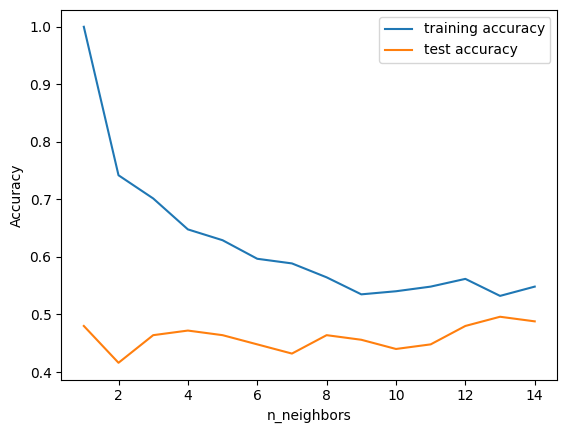

In [4]:
#KNN

neighbors_settings = range(1,15)
training_accuracy = []
test_accuracy = []
for n_neighbors in neighbors_settings:
    # build the model
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(x_train, y_train)
  # record training set accuracy
  training_accuracy.append(knn.score(x_train, y_train))
  # record generalization accuracy
  test_accuracy.append(knn.score(x_test, y_test))

print(training_accuracy, test_accuracy)
print("-----------------------------Task 1 end------------------------------------\n\n")
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [5]:
n_neighbors = 13
# model = KNeighborsClassifier(n_neighbors)
model = LinearSVC(dual=True,random_state=1,max_iter=1000)
# model = GaussianNB()
# model = DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)
training_accuracy = model.score(x_train,y_train)
test_accuracy = model.score(x_test, y_test)

print("-----------------------------Task 1-----------------------------------")
print("Training accuracy:{:.3f}, Test accuracy:{:.3f} \n".format(training_accuracy, test_accuracy))

prediction = model.predict(x_test)
print("-----------------------------Task 2------------------------------------")
print("Confusion matrix:")
print(pd.crosstab(y_test, prediction, rownames=['True'], colnames=['Predicted'], margins=True),"\n")

scores = cross_val_score(model, X, Y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
warnings.filterwarnings("ignore")

c:\Users\jbsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jbsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jbsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------Task 1-----------------------------------
Training accuracy:0.546, Test accuracy:0.512 

-----------------------------Task 2------------------------------------
Confusion matrix:
Predicted   C  PF  PG  SF  SG  All
True                              
C          19   2   0   2   0   23
PF         10   6   3   2   5   26
PG          0   3  21   0   0   24
SF          2   6   2   1  10   21
SG          1   2  10   1  17   31
All        32  19  36   6  32  125 



c:\Users\jbsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jbsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jbsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jbsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jbsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

Cross-validation scores: [0.58       0.36       0.44       0.44       0.54       0.44
 0.52       0.55102041 0.57142857 0.46938776]
Average cross-validation score: 0.49


c:\Users\jbsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jbsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
# KNN
n_neighbors = 13
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
# record training set accuracy
training_accuracy = knn.score(x_train, y_train)
test_accuracy = knn.score(x_test, y_test)

print("-----------------------------Task 1-----------------------------------")
print("Training accuracy:{:.3f}, Test accuracy:{:.3f} \n\n".format(training_accuracy, test_accuracy))

prediction = knn.predict(x_test)
print("-----------------------------Task 2------------------------------------")
print("Confusion matrix:")
print(pd.crosstab(y_test, prediction, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n\n")


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
fold_acc = []
for train_index, test_index in skf.split(X, Y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    knn.fit(x_train_fold, y_train_fold)
    fold_acc.append(knn.score(x_test_fold, y_test_fold))

print("-----------------------------Task 3------------------------------------")
print(fold_acc)
print(sum(fold_acc)/len(fold_acc))

-----------------------------Task 1-----------------------------------
Training accuracy:0.532, Test accuracy:0.496 


-----------------------------Task 2------------------------------------
Confusion matrix:
Predicted   C  PF  PG  SF  SG  All
True                              
C          14   7   1   1   0   23
PF          4   9   2   4   7   26
PG          0   2  14   1   7   24
SF          2   3   1   7   8   21
SG          0   5   4   4  18   31
All        20  26  22  17  40  125



-----------------------------Task 3------------------------------------
[0.36, 0.52, 0.5, 0.52, 0.42, 0.54, 0.48, 0.32653061224489793, 0.46938775510204084, 0.46938775510204084]
0.46053061224489794


In [7]:
linearsvm = LinearSVC(random_state=1).fit(x_train, y_train)
# print("Test set score: {:.3f}".format(linearsvm.score(x_train, y_train)))
# print("Test set score: {:.3f}".format(linearsvm.score(x_test, y_test)))

svm_train_acc = linearsvm.score(x_train, y_train)
svm_test_acc = linearsvm.score(x_test, y_test)

print("-----------------------------Task 1-----------------------------------")
print("Training accuracy:{:.3f}, Test accuracy:{:.3f} \n\n".format(svm_train_acc, svm_test_acc))

svm_prediction = linearsvm.predict(x_test)
print("-----------------------------Task 2------------------------------------")
print("Confusion matrix:")
print(pd.crosstab(y_test, svm_prediction, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n\n")


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
fold_acc = []
for train_index, test_index in skf.split(X, Y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    linearsvm.fit(x_train_fold, y_train_fold)
    fold_acc.append(linearsvm.score(x_test_fold, y_test_fold))

print("-----------------------------Task 3------------------------------------")
print(fold_acc)
print(sum(fold_acc)/len(fold_acc))

-----------------------------Task 1-----------------------------------
Training accuracy:0.546, Test accuracy:0.512 


-----------------------------Task 2------------------------------------
Confusion matrix:
Predicted   C  PF  PG  SF  SG  All
True                              
C          19   2   0   2   0   23
PF         10   6   3   2   5   26
PG          0   3  21   0   0   24
SF          2   6   2   1  10   21
SG          1   2  10   1  17   31
All        32  19  36   6  32  125



-----------------------------Task 3------------------------------------
[0.5, 0.5, 0.46, 0.54, 0.6, 0.5, 0.48, 0.46938775510204084, 0.4897959183673469, 0.46938775510204084]
0.5008571428571428


In [109]:
# import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

dataset = pd.read_csv("nba2021.csv")
# print("dataset.keys(): {}".format(dataset.keys()))
X = dataset.drop(['Player', 'Pos', 'Tm', 'GS', 'FG%','2P%','3P%','eFG%','FTA','STL','TOV'], axis=1)
Y = dataset['Pos']
# , 'Tm', 'GS', 'MP', 'FGA', '3PA', '2PA', 'FTA', 'ORB','DRB'

# print(X.keys)
#Split
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=dataset['Pos'], random_state=10, train_size=0.75, test_size=0.25)
#standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
X = scaler.fit_transform(X)
model = svm.SVC(kernel='linear',C=8)
model.fit(x_train,y_train)
training_accuracy = model.score(x_train,y_train)
test_accuracy = model.score(x_test, y_test)
print("-----------------------------Task 1-----------------------------------")
print("Training accuracy:{:.3f}, Test accuracy:{:.3f} \n".format(training_accuracy, test_accuracy))
prediction = model.predict(x_test)
print("-----------------------------Task 2------------------------------------")
print("Confusion matrix:")
print(pd.crosstab(y_test, prediction, rownames=['True'], colnames=['Predicted'], margins=True),"\n")
warnings.filterwarnings("ignore")

scores = cross_val_score(model, X, Y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
warnings.filterwarnings("ignore")

-----------------------------Task 1-----------------------------------
Training accuracy:0.602, Test accuracy:0.560 

-----------------------------Task 2------------------------------------
Confusion matrix:
Predicted   C  PF  PG  SF  SG  All
True                              
C          22   1   0   0   0   23
PF         10   9   2   0   5   26
PG          0   2  16   0   6   24
SF          3   9   0   3   6   21
SG          0   4   7   0  20   31
All        35  25  25   3  37  125 

Cross-validation scores: [0.56       0.52       0.48       0.48       0.44       0.48
 0.5        0.55102041 0.6122449  0.53061224]
Average cross-validation score: 0.52


In [9]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings

# n_neighbors = 13
# model = KNeighborsClassifier(n_neighbors)
# model = LinearSVC(dual='auto',random_state=1,C = 100,penalty='sq')

# model = GaussianNB()
# model = DecisionTreeClassifier(random_state=10, max_depth=1000)

# scores = cross_val_score(model, X, Y, cv=10)
# print("Cross-validation scores: {}".format(scores))
# print("Average cross-validation score: {:.2f}".format(scores.mean()))
# warnings.filterwarnings("ignore")